In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import operator
import time
%matplotlib inline

In [2]:
# The following lines you can ignore. It was needed to properly use the current version of Tensorflow on my Macbook 
# due to issues with OpenMP. Leaving here in case it's useful for others.
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:

dfWhite = pd.read_csv('winequality-white.csv', sep=';', header=0)

In [4]:
#Get all the variable names
var = dfWhite.columns.tolist()
var.pop()

'quality'

In [5]:
x = dfWhite[var].values
y = dfWhite['quality'].values


In [6]:
ycopy = np.copy(y)
ycopy[ycopy<6] = 0;
ycopy[ycopy==6] = 1;
ycopy[ycopy==7] = 1;
ycopy[ycopy>7] = 2;


In [7]:


x_data = x
y_data_noRelabel = y
y_data_relabel = ycopy
x_data_size = x_data.shape[0]


In [8]:
x_orig = dfWhite[var].values


In [9]:
y_data_relabel

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [10]:
def knnAccuracy(x_data, y_data, x_data_size, k):
    count = 0
    for i in range(x_data_size):
        x_test = x_data[i]
        y_test = y_data[i]
        diffMat = np.tile(x_test, (x_data_size,1)) - x_data
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        distances = sqDistances**0.5
        sortedDistances = distances.argsort()


        classCount = {}

        for i in range(k):
            votelabel = y_data[sortedDistances[i]]
            classCount[votelabel] = classCount.get(votelabel,0) + 1

        # Get rid of itself
        classCount[y_test] -= 1

        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
        knnclass = sortedClassCount[0][0]

        if knnclass==y_test:
            count += 1


    return count/x_data_size

In [11]:
# sqDiffMat = diffMat**2
# sqDistances = sqDiffMat.sum(axis=1)
# distances = sqDistances**0.5
# sortedDistances = distances.argsort()


In [12]:
# classCount = {}

# k = 5
# for i in range(k):
#     votelabel = y_data[sortedDistances[i]]
#     classCount[votelabel] = classCount.get(votelabel,0) + 1

In [13]:
# classCount

In [14]:
# sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
# knnclass = sortedClassCount[0][0]
# knnclass

In [15]:
acc1 = []
t = time.time()
print(x_orig)
for k in range(3,50,2):
    result = knnAccuracy(x_orig, y_data_noRelabel, x_data_size, k)
    acc1.append(result)
elapsed = time.time()-t
t = time.time()
acc2 = []
for k in range(3,50,2):
    result = knnAccuracy(x_orig, y_data_relabel, x_data_size, k)
    acc2.append(result)
elapsed2 = time.time()-t

print(elapsed)
print(elapsed2)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
46.43069267272949
46.122328758239746


Text(0.5,1,'kNN accuracy without data scaling')

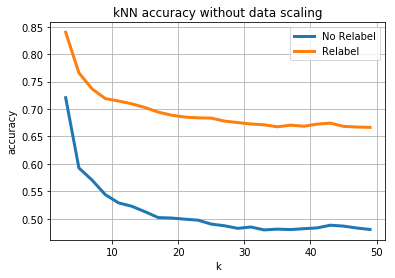

In [16]:
klist = [i for i in range(3,50,2)]
plt.plot(klist,acc1,'-',linewidth=3)
plt.plot(klist,acc2,'-',linewidth=3)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(['No Relabel', 'Relabel'])
plt.title('kNN accuracy without data scaling')

In [17]:

fixed_acidity = dfWhite['fixed acidity'].values
fixed_acidity_max = np.max(fixed_acidity)
fixed_acidity = 2*(fixed_acidity/fixed_acidity_max - 0.5)

volatile_acidity = dfWhite['volatile acidity'].values
volatile_acidity_max = np.max(volatile_acidity)
volatile_acidity = 2*(volatile_acidity/volatile_acidity_max - 0.5)

x_rescale = np.stack((fixed_acidity, volatile_acidity), axis=-1)


for i in range(2,len(var)):
    current_column = dfWhite[var[i]].values
    current_column_max = np.max(current_column)
    current_column = 2*(current_column/current_column_max - 0.5)
    x_rescale = np.hstack((x_rescale, np.atleast_2d(current_column).T)) 
x_rescale

array([[-0.01408451, -0.50909091, -0.56626506, ...,  0.57068063,
        -0.16666667,  0.23943662],
       [-0.11267606, -0.45454545, -0.59036145, ...,  0.72774869,
        -0.09259259,  0.33802817],
       [ 0.14084507, -0.49090909, -0.51807229, ...,  0.70680628,
        -0.18518519,  0.42253521],
       ...,
       [-0.08450704, -0.56363636, -0.77108434, ...,  0.56544503,
        -0.14814815,  0.32394366],
       [-0.22535211, -0.47272727, -0.63855422, ...,  0.7486911 ,
        -0.2962963 ,  0.8028169 ],
       [-0.15492958, -0.61818182, -0.54216867, ...,  0.70680628,
        -0.40740741,  0.66197183]])

In [18]:
acc3 = []
t = time.time()
print(x_rescale)
for k in range(3,50,2):
    result = knnAccuracy(x_rescale, y_data_noRelabel, x_data_size, k)
    acc3.append(result)
elapsed = time.time()-t
t = time.time()
acc4 = []
for k in range(3,50,2):
    result = knnAccuracy(x_rescale, y_data_relabel, x_data_size, k)
    acc4.append(result)
elapsed2 = time.time()-t

print(elapsed)
print(elapsed2)

[[-0.01408451 -0.50909091 -0.56626506 ...  0.57068063 -0.16666667
   0.23943662]
 [-0.11267606 -0.45454545 -0.59036145 ...  0.72774869 -0.09259259
   0.33802817]
 [ 0.14084507 -0.49090909 -0.51807229 ...  0.70680628 -0.18518519
   0.42253521]
 ...
 [-0.08450704 -0.56363636 -0.77108434 ...  0.56544503 -0.14814815
   0.32394366]
 [-0.22535211 -0.47272727 -0.63855422 ...  0.7486911  -0.2962963
   0.8028169 ]
 [-0.15492958 -0.61818182 -0.54216867 ...  0.70680628 -0.40740741
   0.66197183]]
42.41341757774353
42.362932205200195


Text(0.5,1,'kNN accuracy with data scaling')

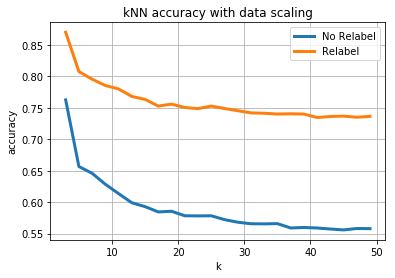

In [19]:
klist = [i for i in range(3,50,2)]
plt.plot(klist,acc3,'-',linewidth=3)
plt.plot(klist,acc4,'-',linewidth=3)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(['No Relabel', 'Relabel'])
plt.title('kNN accuracy with data scaling')

[0.7207023274806044, 0.592690894242548, 0.5704369130257247, 0.5438954675377705, 0.5289914250714577, 0.5228664761126991, 0.5128623928133932, 0.5022458146182115, 0.5014291547570436, 0.4993875051041241, 0.49755002041649654, 0.4904042466312781, 0.4873417721518987, 0.48264597795018377, 0.4850959575336872, 0.4797876684360964, 0.4812168231931401, 0.4804001633319722, 0.4820334830543079, 0.48346263781135157, 0.4883625969783585, 0.4867292772560229, 0.4832584728460596, 0.4806043282972642]
[0.8399346672111065, 0.7660269497754185, 0.7366271947733769, 0.7190690077582687, 0.7145773785218457, 0.7094732543895468, 0.7027358105349122, 0.694365046957942, 0.6888525928950592, 0.685381788485096, 0.6839526337280523, 0.6835443037974683, 0.6780318497345855, 0.6753777051857901, 0.6727235606369947, 0.671294405879951, 0.6676194365046958, 0.6706819109840751, 0.6686402613311556, 0.6725193956717027, 0.6743568803593304, 0.6684360963658637, 0.6672111065741119, 0.666598611678236]
[0.7623519804001634, 0.6565945283789302,